In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [2]:
pathToFile = '/Users/delinaivanova/Downloads/assignment2-data/LD2011_2014.txt'
import fileinput

with fileinput.FileInput(pathToFile, inplace=True) as file:
    for line in file:
        print(line.replace(",", "."), end="")

In [3]:
df = pd.read_csv('/Users/delinaivanova/Downloads/assignment2-data/LD2011_2014.txt', sep=';')

In [5]:
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [6]:
df.set_index('date', inplace=True)

In [7]:
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


<Axes: xlabel='date'>

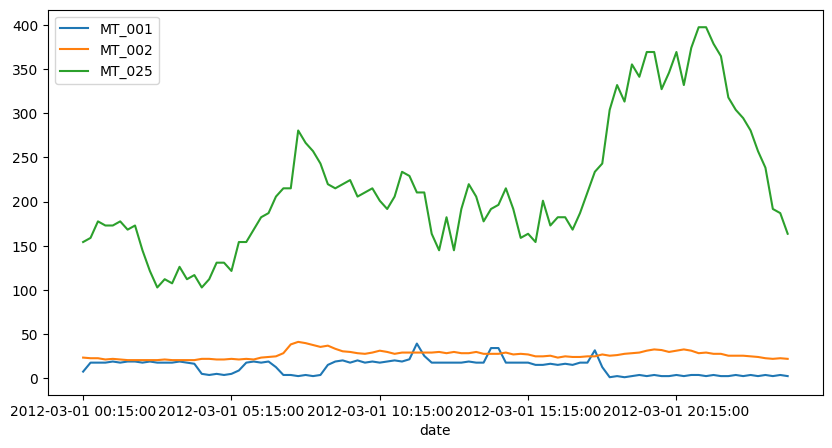

In [16]:
df_test = df.loc['2012-03-01 00:15:00':'2012-03-02 00:00:00'][['MT_001','MT_002', 'MT_025']]
df_test.plot(figsize=(10,5))

In [18]:
data2011 = df.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = df.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = df.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = df.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [19]:
data2013.shape

(35040, 370)

In [20]:
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [22]:
data2013

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,64.953605,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,61.384725,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,42.826552,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649
2013-01-01 01:00:00,1.269036,23.470839,2.606429,130.081301,56.097561,226.190476,6.218202,249.158249,50.699301,75.268817,...,44.254104,15800.0,860.759494,840.909091,16.949153,4.095963,575.065847,58.430718,722.873900,7848.648649
2013-01-01 01:15:00,3.807107,23.470839,2.606429,130.081301,58.536585,229.166667,6.783493,239.057239,57.692308,74.193548,...,44.254104,15000.0,793.248945,818.181818,16.949153,4.095963,570.676032,60.100167,748.533724,7610.810811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 23:00:00,3.807107,24.893314,1.737619,138.211382,81.707317,297.619048,6.783493,242.424242,62.937063,70.967742,...,143.468951,18600.0,2008.438819,1363.636364,19.556714,11.702750,258.121159,50.083472,703.812317,7729.729730
2013-12-31 23:15:00,2.538071,25.604552,1.737619,128.048780,79.268293,276.785714,7.348785,245.791246,48.951049,70.967742,...,137.758744,17700.0,1607.594937,1068.181818,19.556714,11.117613,269.534680,46.744574,695.747801,7189.189189
2013-12-31 23:30:00,2.538071,25.604552,1.737619,150.406504,80.487805,273.809524,7.348785,265.993266,57.692308,72.043011,...,129.907209,16100.0,1535.864979,1090.909091,16.949153,11.117613,258.999122,50.083472,744.868035,6972.972973


In [23]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = pd.concat([data2013,data2014], axis=0) #combine 13 and 14
data_13_14.drop(clients_no_demand, axis=1, inplace=True)

In [24]:
data_13_14.shape

(70080, 349)

In [25]:
data = data_13_14.copy() # make a copy to shorten data set name

In [26]:
data['hour'] = data.index.map(lambda x: x[11:])

In [27]:
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00
2013-01-01 01:00:00,1.269036,23.470839,2.606429,130.081301,56.097561,226.190476,6.218202,249.158249,50.699301,75.268817,...,15800.0,860.759494,840.909091,16.949153,4.095963,575.065847,58.430718,722.873900,7848.648649,01:00:00
2013-01-01 01:15:00,3.807107,23.470839,2.606429,130.081301,58.536585,229.166667,6.783493,239.057239,57.692308,74.193548,...,15000.0,793.248945,818.181818,16.949153,4.095963,570.676032,60.100167,748.533724,7610.810811,01:15:00


In [29]:
grouped_data = data.groupby('hour')
average_curves = grouped_data.agg('mean')
average_curves.shape

(96, 349)

In [30]:
average_curves

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,5.008344,26.045909,1.938755,130.551843,60.374206,191.136660,7.772366,242.027582,51.585401,54.837237,...,119.625903,36306.438356,1333.223513,1652.677460,37.831080,16.499275,676.790504,148.683880,799.235729,17333.891151
00:15:00,4.917947,25.833512,1.911381,125.863125,57.586034,179.297130,7.426996,232.516950,50.016764,53.424658,...,119.540837,32137.534247,979.064794,1443.711083,33.942955,16.580232,659.875882,155.464587,795.100028,17466.227323
00:30:00,4.984007,24.754964,1.909001,121.566990,55.476111,171.554958,7.179972,225.317098,48.843280,52.514361,...,111.557303,27249.178082,938.598925,1324.501868,31.044275,15.940589,655.911819,153.879754,777.630258,17605.301740
00:45:00,4.980530,24.656560,1.899480,117.961354,53.630137,164.452870,7.013482,218.698400,47.574001,51.150390,...,97.361963,24234.109589,837.292642,1134.433375,30.245932,15.121396,644.171167,151.146889,769.361869,17589.559422
01:00:00,4.963146,23.665699,1.863775,111.732932,52.123288,155.850457,6.843894,212.291868,46.570553,50.223892,...,91.873711,20504.383562,812.213167,1110.118306,29.617260,15.693709,640.233562,148.288243,763.943679,17574.838949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,5.175231,26.859448,2.029206,154.276646,69.679252,241.809361,8.759689,282.270190,60.855925,63.423185,...,214.890538,58302.328767,2422.484249,3540.815691,104.439999,17.210257,704.703718,153.067899,825.106456,17683.613476
23:00:00,5.319519,26.919854,1.973269,148.123399,68.810558,234.515656,8.617205,275.485448,59.574672,62.060686,...,186.405014,52881.095890,2283.053003,3428.486924,97.120966,17.076397,706.203471,150.689505,821.116378,17534.542762
23:15:00,5.356025,26.839962,1.962558,141.869919,67.398931,223.434442,8.373278,267.040266,57.366606,59.584622,...,164.177251,47958.219178,2119.206982,2913.449564,82.870461,16.923299,697.439475,149.175567,827.424376,17311.010737


<Axes: xlabel='hour'>

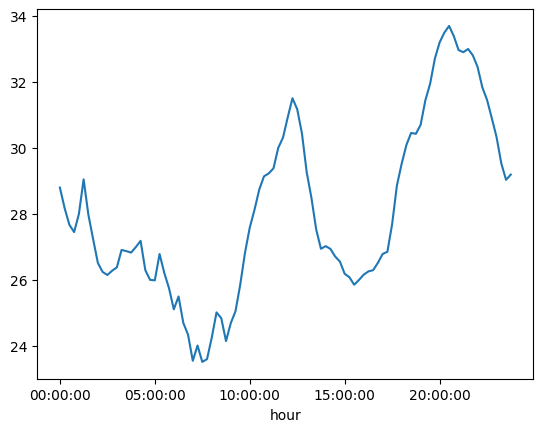

In [34]:
average_curves['MT_032'].plot()

<Axes: xlabel='hour'>

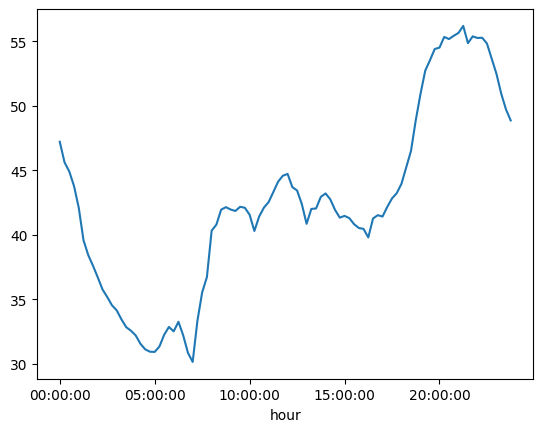

In [35]:
average_curves['MT_020'].plot()

In [37]:
avg_curves_norm = average_curves/average_curves.mean()

In [38]:
avg_curves_norm

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.964792,0.926674,0.991800,1.140106,1.186498,1.008914,1.170686,0.946572,0.983915,0.948867,...,0.414676,0.748555,0.561491,0.430085,0.471574,1.358632,1.215272,1.170441,0.974307,0.992967
00:15:00,0.947378,0.919117,0.977796,1.099159,1.131703,0.946419,1.118666,0.909376,0.953996,0.924425,...,0.414381,0.662602,0.412336,0.375704,0.423108,1.365299,1.184899,1.223818,0.969266,1.000548
00:30:00,0.960104,0.880744,0.976579,1.061641,1.090238,0.905552,1.081459,0.881217,0.931614,0.908674,...,0.386706,0.561815,0.395294,0.344682,0.386975,1.312627,1.177781,1.211343,0.947969,1.008515
00:45:00,0.959434,0.877243,0.971708,1.030153,1.053960,0.868064,1.056382,0.855331,0.907404,0.885073,...,0.337499,0.499651,0.352628,0.295219,0.377024,1.245171,1.156699,1.189829,0.937889,1.007613
01:00:00,0.956085,0.841989,0.953443,0.975761,1.024347,0.822656,1.030838,0.830275,0.888265,0.869041,...,0.318475,0.422753,0.342066,0.288892,0.369187,1.292298,1.149629,1.167326,0.931284,1.006770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,0.996941,0.955618,1.038072,1.347294,1.369364,1.276390,1.319398,1.103961,1.160737,1.097433,...,0.744905,1.202059,1.020236,0.921445,1.301872,1.417178,1.265394,1.204952,1.005845,1.013001
23:00:00,1.024736,0.957767,1.009456,1.293558,1.352292,1.237890,1.297937,1.077426,1.136299,1.073857,...,0.646161,1.090286,0.961514,0.892213,1.210639,1.406155,1.268087,1.186229,1.000981,1.004462
23:15:00,1.031768,0.954925,1.003976,1.238946,1.324550,1.179398,1.261197,1.044397,1.094183,1.031013,...,0.569110,0.988787,0.892510,0.758182,1.033002,1.393548,1.252350,1.174311,1.008670,0.991657


<Axes: xlabel='hour'>

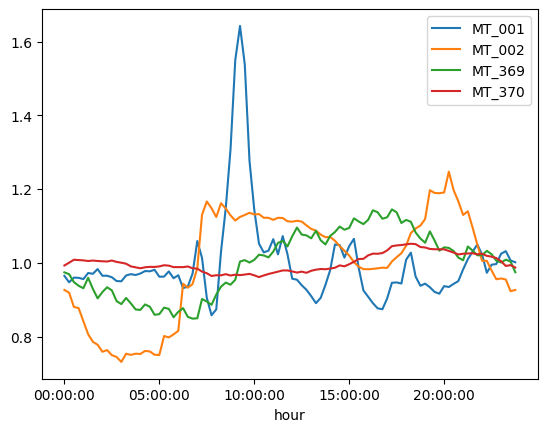

In [40]:
avg_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()

In [41]:
X = avg_curves_norm.copy()
X = np.array(X.T)

In [42]:
X

array([[0.96479215, 0.94737834, 0.96010381, ..., 1.03176835, 1.00665227,
        1.00162906],
       [0.92667365, 0.91911689, 0.8807438 , ..., 0.95492484, 0.9233459 ,
        0.92656966],
       [0.99179969, 0.97779638, 0.9765787 , ..., 1.00397648, 0.99849693,
        0.99301737],
       ...,
       [1.17044059, 1.22381837, 1.21134255, ..., 1.17431116, 1.15378816,
        1.13637963],
       [0.97430716, 0.96926554, 0.94796904, ..., 1.00867049, 1.00368029,
        0.97461078],
       [0.99296729, 1.00054813, 1.00851498, ..., 0.99165659, 0.99394714,
        0.98743097]])

In [48]:
del silhouette_score

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

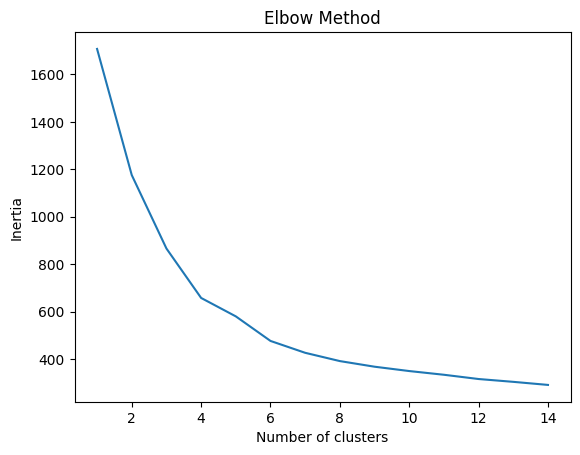

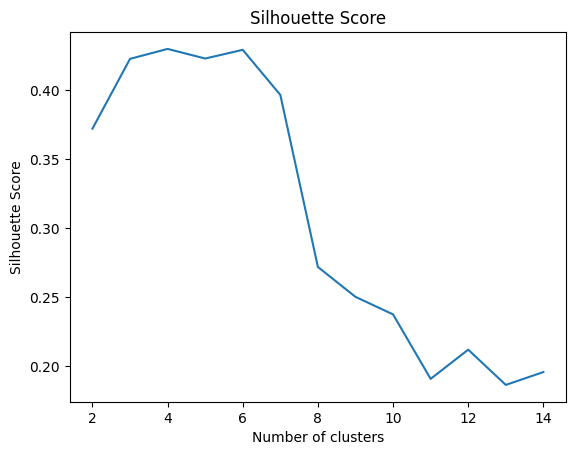

In [53]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [54]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


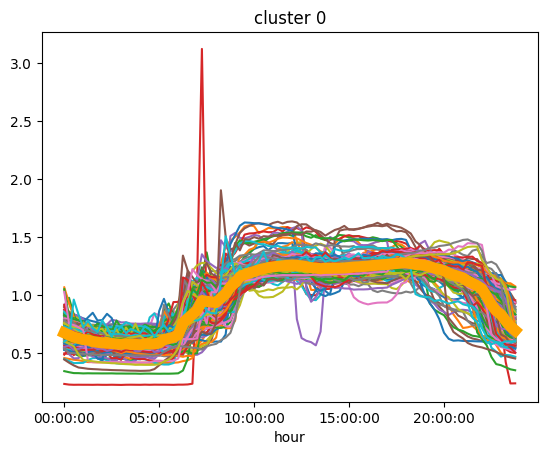

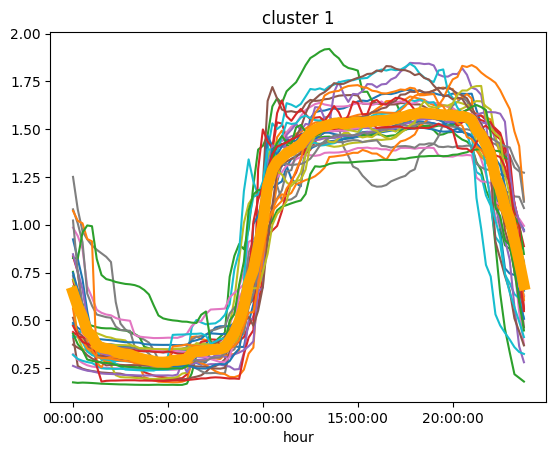

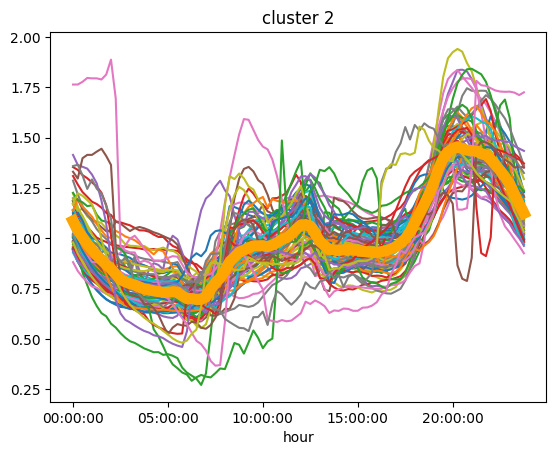

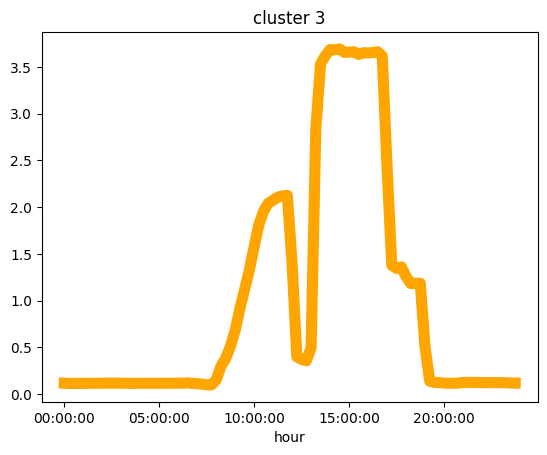

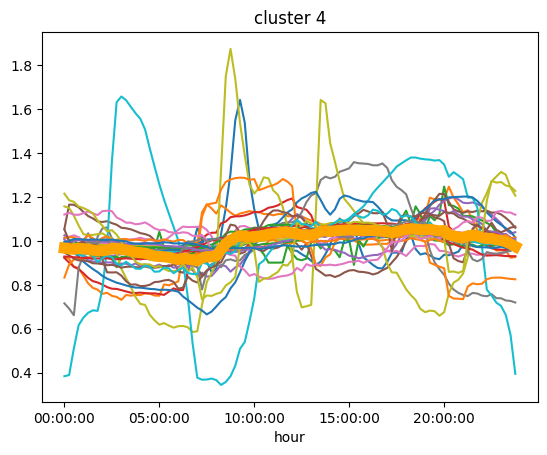

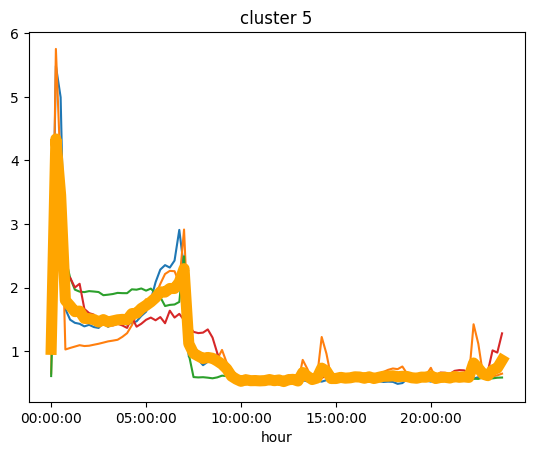

In [57]:
# create plots

for c in range(K):
    avg_curves_norm.T[kmeans.labels_==c].T.plot(legend=False)
    plt.plot(kmeans.cluster_centers_[c], linewidth=8, color='orange')
    plt.title("cluster "+str(c))

In [56]:
avg_curves_norm.T

hour,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
MT_001,0.964792,0.947378,0.960104,0.959434,0.956085,0.972494,0.970485,0.983211,0.965127,0.965127,...,1.030429,1.049852,1.022727,0.973164,0.994931,0.996941,1.024736,1.031768,1.006652,1.001629
MT_002,0.926674,0.919117,0.880744,0.877243,0.841989,0.806701,0.786076,0.778034,0.759108,0.763579,...,1.095834,1.049731,1.005708,1.005500,0.979363,0.955618,0.957767,0.954925,0.923346,0.926570
MT_003,0.991800,0.977796,0.976579,0.971708,0.953443,0.949181,0.954660,0.947354,0.918739,0.925436,...,1.111741,1.101391,1.092867,1.081908,1.069122,1.038072,1.009456,1.003976,0.998497,0.993017
MT_004,1.140106,1.099159,1.061641,1.030153,0.975761,0.920906,0.897345,0.875850,0.855450,0.836217,...,1.502958,1.495640,1.462960,1.422622,1.389845,1.347294,1.293558,1.238946,1.209744,1.175290
MT_005,1.186498,1.131703,1.090238,1.053960,1.024347,0.992994,0.962757,0.934785,0.918994,0.903958,...,1.366081,1.376127,1.382463,1.388340,1.385878,1.369364,1.352292,1.324550,1.272842,1.231541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT_366,1.358632,1.365299,1.312627,1.245171,1.292298,1.246425,1.221937,1.160817,1.096199,0.922938,...,1.361140,1.352362,1.356124,1.300020,1.358302,1.417178,1.406155,1.393548,1.360414,1.324442
MT_367,1.215272,1.184899,1.177781,1.156699,1.149629,1.139513,1.125489,1.092430,1.069030,1.043176,...,1.002055,1.014598,1.021865,1.182977,1.273484,1.265394,1.268087,1.252350,1.247264,1.227273
MT_368,1.170441,1.223818,1.211343,1.189829,1.167326,1.105127,0.993529,0.914299,0.842847,0.789775,...,1.298331,1.280347,1.264828,1.242055,1.223890,1.204952,1.186229,1.174311,1.153788,1.136380
MT_369,0.974307,0.969266,0.947969,0.937889,0.931284,0.959546,0.929746,0.903852,0.920795,0.933955,...,1.033427,1.020555,1.020748,1.032500,1.023658,1.005845,1.000981,1.008670,1.003680,0.974611


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


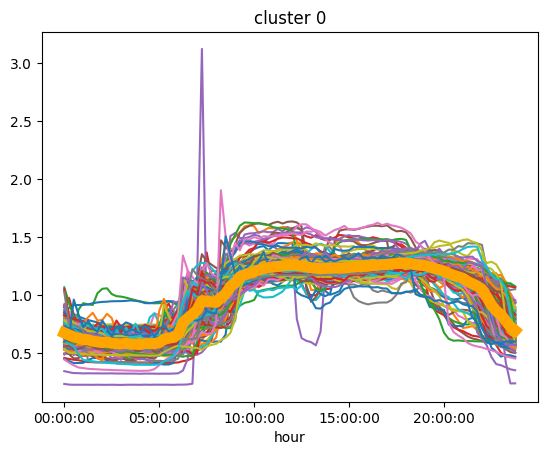

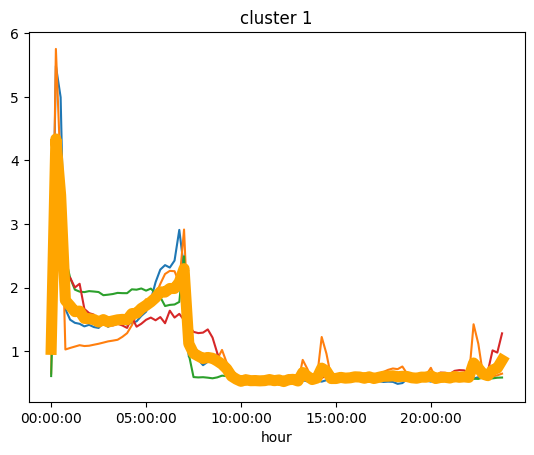

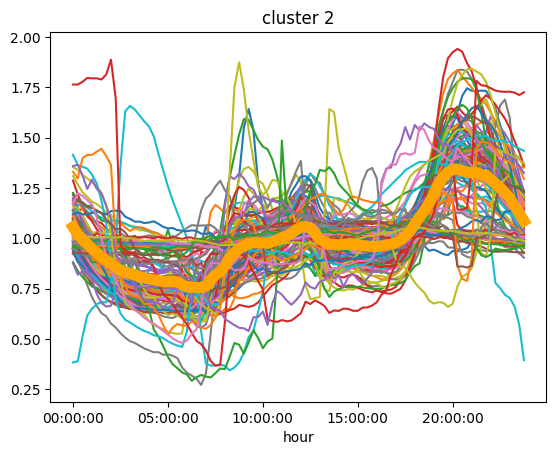

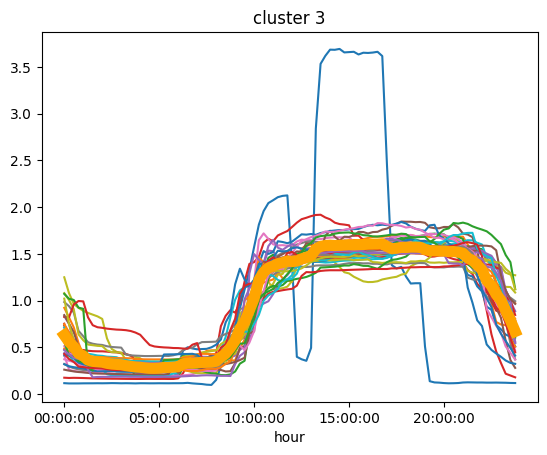

In [58]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

# create plots

for c in range(K):
    avg_curves_norm.T[kmeans.labels_==c].T.plot(legend=False)
    plt.plot(kmeans.cluster_centers_[c], linewidth=8, color='orange')
    plt.title("cluster "+str(c))

In [60]:
client = 'MT_022'
oneclient = data_13_14[client]

In [61]:
oneclient

date
2013-01-01 00:15:00    31.133250
2013-01-01 00:30:00    28.642590
2013-01-01 00:45:00    27.397260
2013-01-01 01:00:00    24.906600
2013-01-01 01:15:00    24.283935
                         ...    
2014-12-31 23:00:00    31.133250
2014-12-31 23:15:00    34.246575
2014-12-31 23:30:00    36.114570
2014-12-31 23:45:00    34.246575
2015-01-01 00:00:00    31.133250
Name: MT_022, Length: 70080, dtype: float64

In [62]:
X = []
for J in range(2*365):
    X.extend([np.array(oneclient[J*96:(J+1)*96])])

In [63]:
X

[array([31.13325031, 28.64259029, 27.39726027, 24.90660025, 24.28393524,
        26.15193026, 26.15193026, 24.90660025, 26.77459527, 23.66127024,
        23.66127024, 21.17061021, 23.03860523, 19.30261519, 18.67995019,
        18.67995019, 19.30261519, 19.30261519, 18.67995019, 19.30261519,
        18.05728518, 18.05728518, 17.43462017, 16.81195517, 17.43462017,
        17.43462017, 17.43462017, 17.43462017, 18.67995019, 21.17061021,
        19.30261519, 20.54794521, 19.9252802 , 21.17061021, 20.54794521,
        21.79327522, 24.90660025, 31.13325031, 23.66127024, 19.30261519,
        21.79327522, 20.54794521, 13.69863014, 16.81195517, 15.56662516,
        18.05728518, 18.05728518, 16.81195517, 19.9252802 , 16.81195517,
        18.05728518, 20.54794521, 16.81195517, 18.67995019, 21.17061021,
        19.9252802 , 16.81195517, 16.18929016, 17.43462017, 18.05728518,
        18.67995019, 15.56662516, 18.05728518, 19.30261519, 18.05728518,
        15.56662516, 17.43462017, 18.05728518, 16.1

In [65]:
from datetime import date, timedelta

d1 = date(2013,1,1)
d2 = date(2014, 12, 31)
delta = d2-d1
daysyear=[]
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri',5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1+timedelta(days=i)).weekday()]+"-"+str(d1+timedelta(days=i))])

In [66]:
daysyear

['tue-2013-01-01',
 'wed-2013-01-02',
 'thu-2013-01-03',
 'fri-2013-01-04',
 'sat-2013-01-05',
 'sun-2013-01-06',
 'mon-2013-01-07',
 'tue-2013-01-08',
 'wed-2013-01-09',
 'thu-2013-01-10',
 'fri-2013-01-11',
 'sat-2013-01-12',
 'sun-2013-01-13',
 'mon-2013-01-14',
 'tue-2013-01-15',
 'wed-2013-01-16',
 'thu-2013-01-17',
 'fri-2013-01-18',
 'sat-2013-01-19',
 'sun-2013-01-20',
 'mon-2013-01-21',
 'tue-2013-01-22',
 'wed-2013-01-23',
 'thu-2013-01-24',
 'fri-2013-01-25',
 'sat-2013-01-26',
 'sun-2013-01-27',
 'mon-2013-01-28',
 'tue-2013-01-29',
 'wed-2013-01-30',
 'thu-2013-01-31',
 'fri-2013-02-01',
 'sat-2013-02-02',
 'sun-2013-02-03',
 'mon-2013-02-04',
 'tue-2013-02-05',
 'wed-2013-02-06',
 'thu-2013-02-07',
 'fri-2013-02-08',
 'sat-2013-02-09',
 'sun-2013-02-10',
 'mon-2013-02-11',
 'tue-2013-02-12',
 'wed-2013-02-13',
 'thu-2013-02-14',
 'fri-2013-02-15',
 'sat-2013-02-16',
 'sun-2013-02-17',
 'mon-2013-02-18',
 'tue-2013-02-19',
 'wed-2013-02-20',
 'thu-2013-02-21',
 'fri-2013-0

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

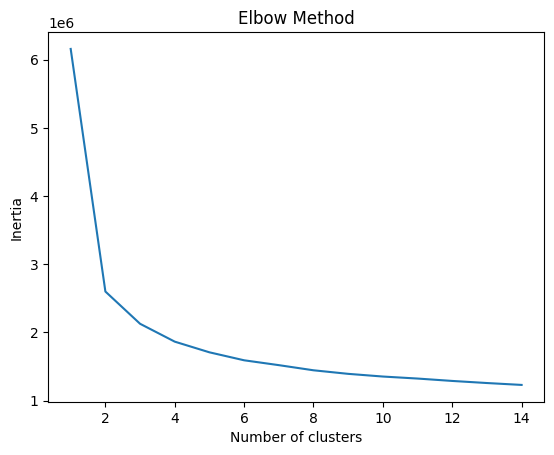

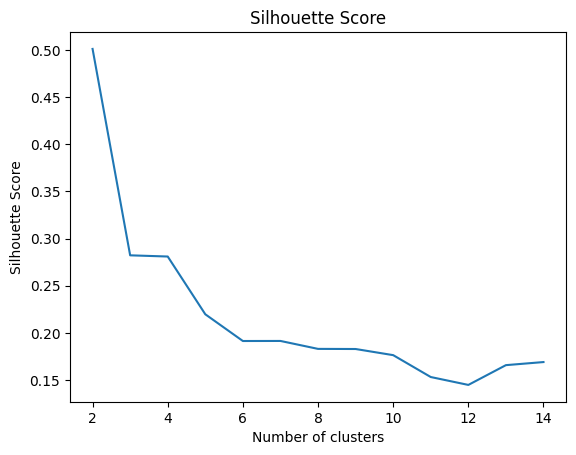

In [67]:
inertia_1 = []
silhouette_avg_1 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia_1.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg_1 = silhouette_avg_1 + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia_1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg_1)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


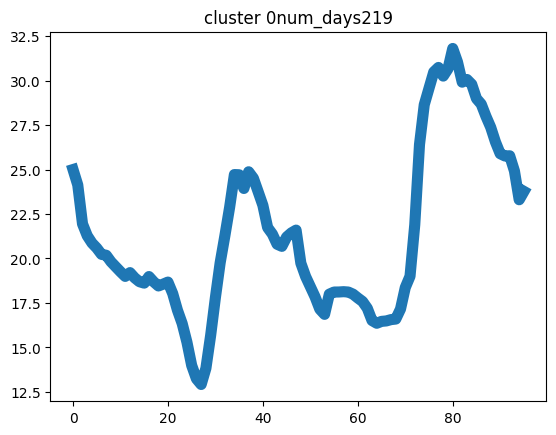

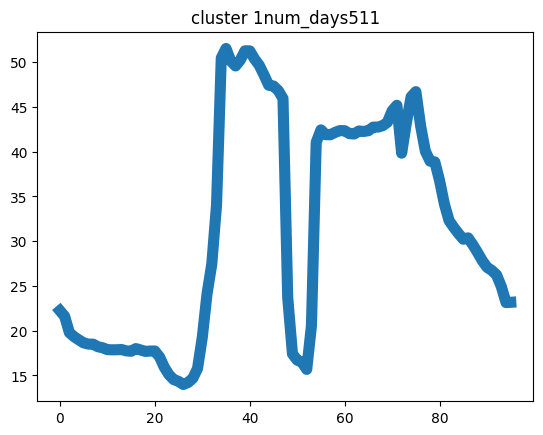

In [75]:
K = 2
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

# create plots

plt.plot(kmeans.cluster_centers_[0], linewidth=8)
plt.title("cluster "+str(0) +'num_days' + str(sum(kmeans.labels_==0)))
plt.show()

plt.plot(kmeans.cluster_centers_[1], linewidth=8)
plt.title("cluster "+str(1) + "num_days"+ str(sum(kmeans.labels_==1)))
plt.show()

In [81]:
from itertools import compress
list(compress(daysyear,kmeans.labels_==1))

['wed-2013-01-02',
 'thu-2013-01-03',
 'fri-2013-01-04',
 'mon-2013-01-07',
 'tue-2013-01-08',
 'wed-2013-01-09',
 'thu-2013-01-10',
 'fri-2013-01-11',
 'mon-2013-01-14',
 'tue-2013-01-15',
 'wed-2013-01-16',
 'thu-2013-01-17',
 'fri-2013-01-18',
 'mon-2013-01-21',
 'tue-2013-01-22',
 'wed-2013-01-23',
 'thu-2013-01-24',
 'fri-2013-01-25',
 'mon-2013-01-28',
 'tue-2013-01-29',
 'wed-2013-01-30',
 'thu-2013-01-31',
 'fri-2013-02-01',
 'mon-2013-02-04',
 'tue-2013-02-05',
 'wed-2013-02-06',
 'thu-2013-02-07',
 'fri-2013-02-08',
 'mon-2013-02-11',
 'wed-2013-02-13',
 'thu-2013-02-14',
 'fri-2013-02-15',
 'mon-2013-02-18',
 'tue-2013-02-19',
 'wed-2013-02-20',
 'thu-2013-02-21',
 'fri-2013-02-22',
 'mon-2013-02-25',
 'tue-2013-02-26',
 'wed-2013-02-27',
 'thu-2013-02-28',
 'fri-2013-03-01',
 'mon-2013-03-04',
 'tue-2013-03-05',
 'wed-2013-03-06',
 'thu-2013-03-07',
 'fri-2013-03-08',
 'mon-2013-03-11',
 'tue-2013-03-12',
 'wed-2013-03-13',
 'thu-2013-03-14',
 'fri-2013-03-15',
 'mon-2013-0

In [82]:
weekdays = []
for i in range(delta.days + 1):
    weekdays.extend([D[(d1 + timedelta(days=i)).weekday()]])

weekdays_CL0 = list(compress(daysyear,kmeans.labels_==0))
weekdays_CL1 = list(compress(daysyear,kmeans.labels_==1))

In [88]:
D

{0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'}

In [83]:
from collections import Counter

print(Counter(weekdays_CL0))
print(Counter(weekdays_CL1))

Counter({'tue-2013-01-01': 1, 'sat-2013-01-05': 1, 'sun-2013-01-06': 1, 'sat-2013-01-12': 1, 'sun-2013-01-13': 1, 'sat-2013-01-19': 1, 'sun-2013-01-20': 1, 'sat-2013-01-26': 1, 'sun-2013-01-27': 1, 'sat-2013-02-02': 1, 'sun-2013-02-03': 1, 'sat-2013-02-09': 1, 'sun-2013-02-10': 1, 'tue-2013-02-12': 1, 'sat-2013-02-16': 1, 'sun-2013-02-17': 1, 'sat-2013-02-23': 1, 'sun-2013-02-24': 1, 'sat-2013-03-02': 1, 'sun-2013-03-03': 1, 'sat-2013-03-09': 1, 'sun-2013-03-10': 1, 'sat-2013-03-16': 1, 'sun-2013-03-17': 1, 'sat-2013-03-23': 1, 'sun-2013-03-24': 1, 'fri-2013-03-29': 1, 'sat-2013-03-30': 1, 'sun-2013-03-31': 1, 'mon-2013-04-01': 1, 'sat-2013-04-06': 1, 'sun-2013-04-07': 1, 'sat-2013-04-13': 1, 'sun-2013-04-14': 1, 'sat-2013-04-20': 1, 'sun-2013-04-21': 1, 'thu-2013-04-25': 1, 'sat-2013-04-27': 1, 'sun-2013-04-28': 1, 'wed-2013-05-01': 1, 'thu-2013-05-02': 1, 'fri-2013-05-03': 1, 'sat-2013-05-04': 1, 'sun-2013-05-05': 1, 'sat-2013-05-11': 1, 'sun-2013-05-12': 1, 'sat-2013-05-18': 1, 'sun